In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 数据导入

In [ ]:
train_data = pd.read_csv('/home/aistudio/data/data43907/train_local.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
1,2,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
2,3,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
3,4,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
4,5,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


### 训练集特征说明
- PassengerID (ID)
- Survived (是否存活)
- Pclass (客舱等级，重要)
- Name (姓名，可结合爬虫)
- Sex (性别，重要)
- Age (年龄，重要)
- SibSp (旁系亲友)
- Parch (直系亲属)
- Ticket (票编号)
- Fare (票价)
- Cabin (客舱编号)
- Embarked (上船港口编号)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          499 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        139 non-null    object 
 11  Embarked     620 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 58.5+ KB


可以看到 Age 和 Cabin 和 Embarked都存在空值

In [ ]:
test_data = pd.read_csv('data/data43907/test_local.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,624,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
1,625,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
2,626,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
3,627,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
4,628,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  268 non-null    int64  
 1   Pclass       268 non-null    int64  
 2   Name         268 non-null    object 
 3   Sex          268 non-null    object 
 4   Age          215 non-null    float64
 5   SibSp        268 non-null    int64  
 6   Parch        268 non-null    int64  
 7   Ticket       268 non-null    object 
 8   Fare         268 non-null    float64
 9   Cabin        65 non-null     object 
 10  Embarked     267 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 23.2+ KB


## 数据初步分析

In [ ]:
train_data['Survived'].value_counts()

0    392
1    231
Name: Survived, dtype: int64

1. 性别与存活率的关系

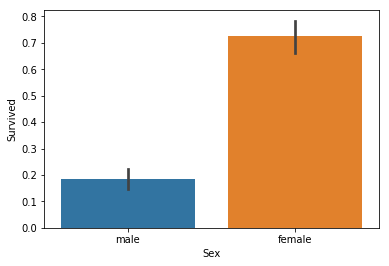

In [ ]:
sns.barplot(x = 'Sex' , y = 'Survived',data = train_data)

2.客舱等级和存活率关系

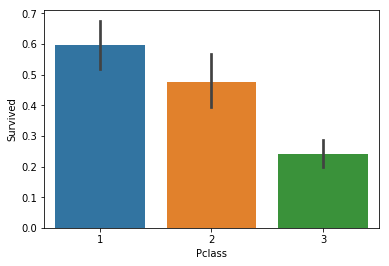

In [ ]:
sns.barplot(x = 'Pclass' , y = 'Survived' , data = train_data)

3. 旁系亲属数量和存活率的关系

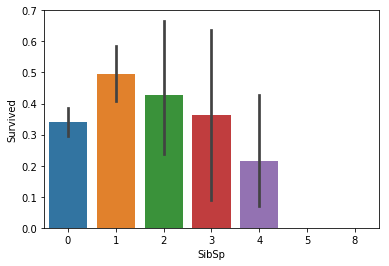

In [ ]:
sns.barplot(x = 'SibSp' , y = 'Survived' , data = train_data)

4.直系亲属数量和存活率的关系

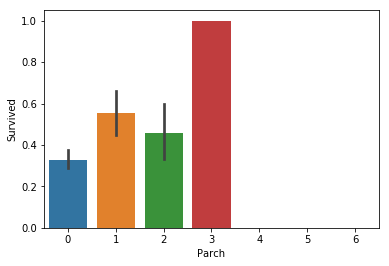

In [ ]:
sns.barplot(x = 'Parch' , y = 'Survived' , data = train_data)

5.从不同的生还情况的密度图看，15岁附近的生还率有明显区别

Text(12.3598,0.5,'density')

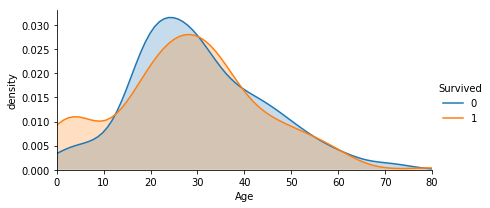

In [ ]:
facet = sns.FacetGrid(train_data , hue = 'Survived' , aspect= 2 )
facet.map(sns.kdeplot , 'Age',shade = True)
#kdeplot核密度估计
facet.set(xlim = (0,train_data['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')


6.上船港口和存活率的关系

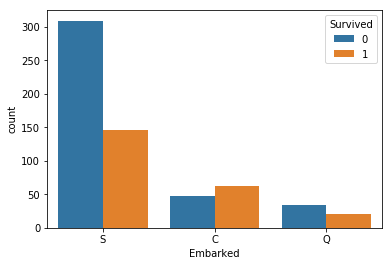

In [ ]:
sns.countplot('Embarked' , hue = 'Survived' , data = train_data)

## 数据清洗

1. 缺失值清洗         
Age缺失值采用平均值来填充缺失值，也可以采用回归方法确定缺失值

In [ ]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

embarked 缺失值，使用出现频率最高的值来填充

In [ ]:
print(train_data['Embarked'].value_counts())
print(test_data['Embarked'].value_counts())

S    455
C    110
Q     55
Name: Embarked, dtype: int64
S    187
C     58
Q     22
Name: Embarked, dtype: int64


In [ ]:
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          623 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        139 non-null    object 
 11  Embarked     623 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 58.5+ KB


2.异常值处理       


## 特征转换

In [ ]:
features = ["Pclass", "Sex", 'Age','Fare','Embarked',"SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
y = train_data["Survived"]
X_test = pd.get_dummies(test_data[features])

In [ ]:
X.head()


,Pclass,Age,Fare,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,4.000000,81.8583,0,2,0,1,0,0,1
1,3,29.256353,7.8958,0,0,0,1,0,0,1
2,3,1.000000,11.1333,1,1,1,0,0,0,1
3,2,36.000000,27.7500,1,2,0,1,0,0,1
4,2,43.000000,26.2500,1,1,0,1,0,0,1


## 分类

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  GridSearchCV

训练模型

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

生成提交结果文件

In [ ]:
predictions = rfc.predict(X_test)
submission = pd.DataFrame({'PassengerID' : test_data.PassengerId , 'Survived': predictions.astype(np.int32)})
submission.to_csv(r'work/rfc_submission.csv',index = False)

使用交叉验证在训练集上进行分类器及其参数进行评估

In [ ]:
cross_val_score(rfc,X,y,cv=5).mean()

0.7946193548387097

使用网格搜索方法寻找分类器最优参数组合

In [ ]:
rfc_best=RandomForestClassifier()
params = {'n_estimators':list(range(50,300,50)),'max_depth':list(range(2,10,2))}
gsearch = GridSearchCV(rfc_best,params,n_jobs=-1,cv = 5,verbose=1)
gsearch.fit(X,y)
print(gsearch.best_params_,gsearch.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s


{'max_depth': 6, 'n_estimators': 200} 0.8298580645161291


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished


In [ ]:
gsearch.best_score_

0.8298580645161291

In [ ]:
sub_data = pd.read_csv('data/kaggledata/test.csv')
sub_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
sub_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [ ]:
sub_data['Embarked'].fillna('S', inplace=True)

Text(12.3598,0.5,'density')

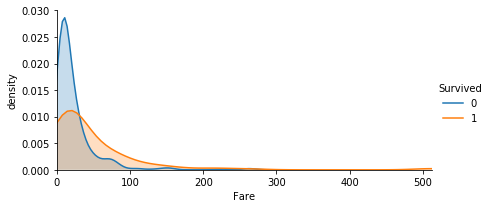

In [ ]:
facet = sns.FacetGrid(train_data , hue = 'Survived' , aspect= 2 )
facet.map(sns.kdeplot , 'Fare',shade = True)
#kdeplot核密度估计
facet.set(xlim = (0,train_data['Fare'].max()))
facet.add_legend()
plt.xlabel('Fare')
plt.ylabel('density')

In [ ]:
train_data.groupby("Pclass")["Fare"].mean()

Pclass
1    86.674671
2    20.692204
3    14.368251
Name: Fare, dtype: float64

使用优化参数后的模型生成提交结果文件

In [ ]:
def FillFare(cols):
    Fare=cols[0]
    Pclass=cols[1]
    if pd.isnull(Fare):
        if Pclass==1:
            return 86.67
        elif Pclass==2:
            return 20.69
        elif Pclass==3:
            return 14.37
    else:
        return Fare

In [ ]:
sub_data["Fare"]=sub_data[["Fare","Pclass"]].apply(FillFare,axis=1)

In [ ]:
X_sub = pd.get_dummies(sub_data[features])

In [ ]:
predictions =gsearch.predict(X_sub)
submission = pd.DataFrame({'PassengerID' :sub_data.PassengerId , 'Survived': predictions.astype(np.int32)})
submission.to_csv(r'work/rfc_best_submission.csv',index = False)